Nama : Nabilah Putri Intaka <br>
Batch : RMT003<br>
Program ini dibuat untuk mengidentifikasi dan mengeksplorasi sales dengan membandingkan sales pada video games berdasarkan genre, platform, publisher 

# Business Objective

Ingin menganalisa dan mengetahui secara detail perbedaan sales video games berdasarkan genre, platform dan publisher yang memiliki sales tertinggi sehingga tim bisa fokus dalam pengembangan games sesuai market

# Identifikasi Masalah

**Using the SMART Framework:**
* S: Analyze the relationship between sales, genre, platform, popular publishers
* M: Calculate sales comparisons based on genre, platform or publisher
* A: Analyze game names, genres, platforms, publishers, and sales
* R: Focus on calculating video game sales to understand the comparison between genres, platforms, or publishers for game development according to the market
* T: The results of the analysis will be completed in the next 1 week.

**Problem Statement:**
Want to identify and explore sales by comparing sales based on genre, platform, publisher for game development according to the market in the next 1 week


# Breaking Down the Problem

Metode 5W+1H:

* Publisher apa yang memiliki sales tertinggi?
* Berapa total sales masing-masing genre?
* Apakah ada perbedaan global sales antara platform PC dan X360? 
* Bagaimana perbandingan total sales antar region?
* Tahun berapa game paling banyak di rilis?
* Di platform mana yang memiliki sales tertinggi di masing-masing region?

Dashboard Tableau : https://public.tableau.com/app/profile/nabilah.putri.intaka1611/viz/VideoGameSalesDashboard_17376436610220/Dashboard?publish=yes

# Data Loading

Sumber Dataset : https://www.kaggle.com/datasets/gregorut/videogamesales

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Memasukan data CSV
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.shape[1] # kolom
df.shape[0] # row

16598

In [4]:
# Cek informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


setelah dilakukan pengecekan data terdapat kesimpulan:
1. Missing value
2. Tipe data

# Data Cleaning

**Missing Value**

In [5]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Rank,Rank,0.000000
Name,Name,0.000000
Platform,Platform,0.000000
Year,Year,1.632727
Genre,Genre,0.000000
Publisher,Publisher,0.349440
NA_Sales,NA_Sales,0.000000
EU_Sales,EU_Sales,0.000000
JP_Sales,JP_Sales,0.000000
Other_Sales,Other_Sales,0.000000


Berdasarkan hasil analisa, terdapat 2 data yg missing value
1. Year: terdapat 1.6%
2. Publisher : 0,3%


In [6]:
# drop Year and Publisher
df = df.dropna(subset=['Year','Publisher']) # menghapus row yang punya nilai kosong di kolom penting    

In [7]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Rank,Rank,0.0
Name,Name,0.0
Platform,Platform,0.0
Year,Year,0.0
Genre,Genre,0.0
Publisher,Publisher,0.0
NA_Sales,NA_Sales,0.0
EU_Sales,EU_Sales,0.0
JP_Sales,JP_Sales,0.0
Other_Sales,Other_Sales,0.0


**Duplicate**

In [8]:
# Cek data duplikat
df.duplicated().sum()

np.int64(0)

**Incosistent Data**

In [9]:
# Cek informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [10]:
# Mengubah tipe data pada kolom Year menjadi date
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.date

In [11]:
# Cek 5 data teratas
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  object 
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


**Export Dataframe**

In [13]:
df.to_csv('dataset_games.csv', index=False)

# Analisa dan Perhitungan

In [184]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [185]:
games = df['Name'].unique()
publishers = df['Publisher'].unique()
platforms = df['Platform'].unique()
game_type = df['Genre'].unique()

print("Number of Games: ",len(games))
print("Publishers: ",len(publishers))
print("Platforms: ",len(platforms))
print("Game Types: ",len(game_type))

Number of Games:  11325
Publishers:  576
Platforms:  31
Game Types:  12


In [34]:
# Top 10 video game publishers
publisher =  df.groupby('Publisher')['Name'].count().reset_index()
publisher = publisher.sort_values('Name',ascending=False).reset_index()
publisher

,index,Publisher,Name
0,138,Electronic Arts,1339
1,21,Activision,966
2,347,Namco Bandai Games,928
3,524,Ubisoft,918
4,275,Konami Digital Entertainment,823
...,...,...,...
571,135,Ecole,1
572,132,EON Digital Entertainment,1
573,131,EA Games,1
574,129,DreamWorks Interactive,1


**Q1 : Publisher apa yang memiliki sales tertinggi?**

Publisher
Nintendo                        1784.43
Electronic Arts                 1093.39
Activision                       721.41
Sony Computer Entertainment      607.28
Ubisoft                          473.54
Take-Two Interactive             399.30
THQ                              340.44
Konami Digital Entertainment     278.56
Sega                             270.70
Namco Bandai Games               253.65
Name: Global_Sales, dtype: float64


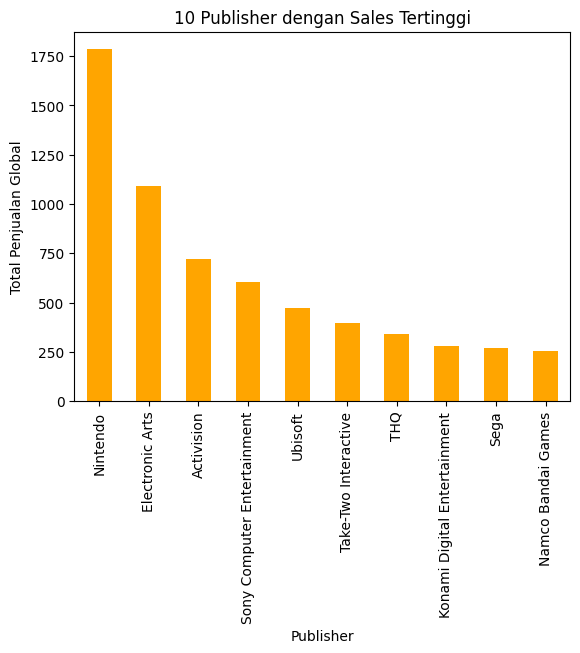

In [52]:
# Menghitung total penjualan per publisher
sales_by_publisher = df.groupby('Publisher')['Global_Sales'].sum()

# Menampilkan 10 publisher dengan penjualan tertinggi
top_10_publishers = sales_by_publisher.sort_values(ascending=False).head(10)
print(top_10_publishers)

# Membuat visualisasi
top_10_publishers.plot(kind='bar', color='orange')
plt.title('10 Publisher dengan Sales Tertinggi')
plt.xlabel('Publisher') 
plt.ylabel('Total Penjualan Global')
plt.show()

**Insight** : Bisa dilihat terdapat perbedaan yang signifikan antara total penjualan dari 2 publisher teratas dengan publisher lainnya. Ini menunjukkan adanya kesenjangan yang cukup besar dalam hal pangsa pasar. Publisher dengan peringkat teratas bisa menjadi target untuk kolaborasi atau analisis lebih lanjut. Mereka mungkin memiliki strategi pemasaran atau pengembangan game yang sangat efektif. untuk publisher dengan sales dibawahnya dapat melakukan improve dengan melihat publisher dengan sales yang lebih tinggi

                             NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Publisher                                                                
Nintendo                       815.75    418.30    454.99        95.19   
Electronic Arts                584.22    367.38     13.98       127.63   
Activision                     426.01    213.72      6.54        74.79   
Sony Computer Entertainment    265.22    187.55     74.10        80.40   
Ubisoft                        252.81    163.03      7.33        50.16   

                             Global_Sales  
Publisher                                  
Nintendo                          1784.23  
Electronic Arts                   1093.21  
Activision                         721.06  
Sony Computer Entertainment        607.27  
Ubisoft                            473.33  


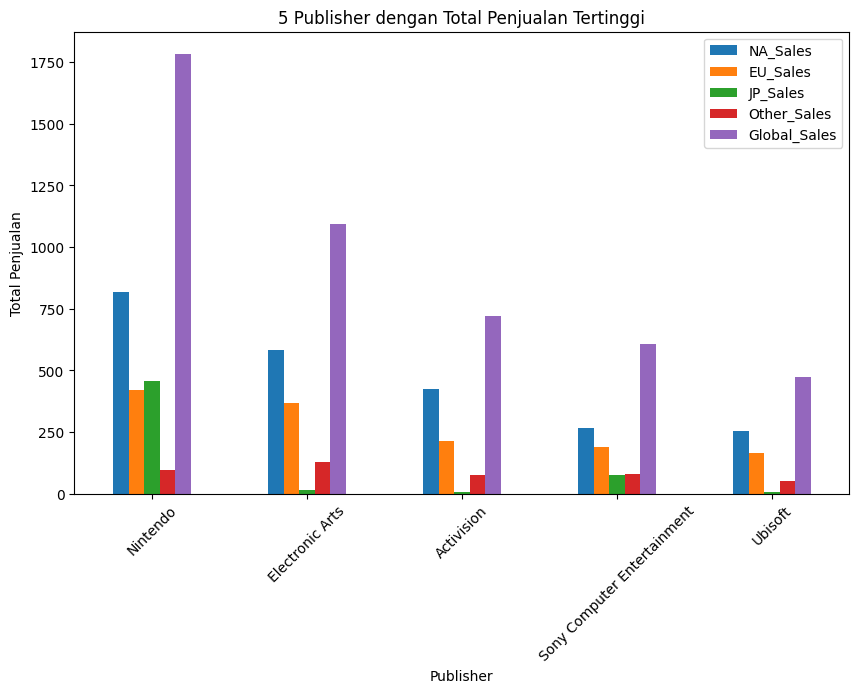

In [ ]:
# Menghitung total penjualan per Publisher di setiap region
sales_by_publisher_region = df.groupby(['Publisher'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Hitung total penjualan global per Publisher
sales_by_publisher_region['Global_Sales'] = sales_by_publisher_region.sum(axis=1)

# Urutkan berdasarkan penjualan global dan ambil 5 teratas
top_5_publishers = sales_by_publisher_region.sort_values('Global_Sales', ascending=False).head(5)

# Menampilkan hasil dalam bentuk tabel
print(top_5_publishers)

# Membuat visualisasi dengan bar chart (fokus pada Global Sales)
top_5_publishers.plot(kind='bar', figsize=(10,6))
plt.title('5 Publisher dengan Total Penjualan Tertinggi')
plt.xlabel('Publisher')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)  # Rotasi label x-axis agar lebih mudah dibaca
plt.legend(loc='upper right')  # Letakkan legenda di pojok kanan atas
plt.show()

Tambahan perbandingan grafik untuk semua region

**Insight :** Grafik ini dengan jelas menunjukkan publisher mana yang mendominasi pasar game secara global. Publisher dengan batang paling tinggi yaitu **Nintendo** memiliki sales tertinggi.
* NA = Nintendo
* EU = Nintendo
* JP = Nintendo
* Others = EA

**Q2 : Berapakah total sales global masing-masing genre?**

In [32]:
# Menghitung total penjualan global untuk setiap genre
total_penjualan_per_genre = df.groupby('Genre')['Global_Sales'].sum()
print(total_penjualan_per_genre)

Genre
Action          1722.84
Adventure        234.59
Fighting         444.05
Misc             789.87
Platform         829.13
Puzzle           242.21
Racing           726.76
Role-Playing     923.83
Shooter         1026.20
Simulation       389.98
Sports          1309.24
Strategy         173.27
Name: Global_Sales, dtype: float64


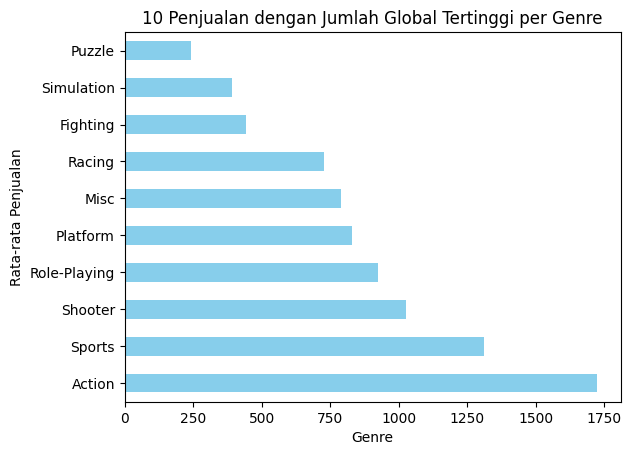

In [78]:
# Mengurutkan berdasarkan total Sales secara descending dan mengambil 10 teratas
top_10_genres = total_penjualan_per_genre.sort_values(ascending=False).head(10)

# Membuat visualisasi
top_10_genres.plot(kind='barh', color='skyblue')
plt.title('10 Penjualan dengan Jumlah Global Tertinggi per Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.show()

 **Insight :**  Batang terpanjang yaitu Genre **Action** menunjukkan genre game yang secara total memiliki penjualan global tertinggi. Ini berarti genre tersebut sangat populer di kalangan pemain game secara global.

           NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Genre                                                             
Action       861.77    516.48    158.65       184.92       1721.82
Platform     445.99    200.65    130.65        51.51        828.80
Misc         396.92    211.77    106.67        73.92        789.28
Fighting     220.74    100.00     87.15        36.19        444.08
Adventure    101.93     63.74     51.99        16.70        234.36


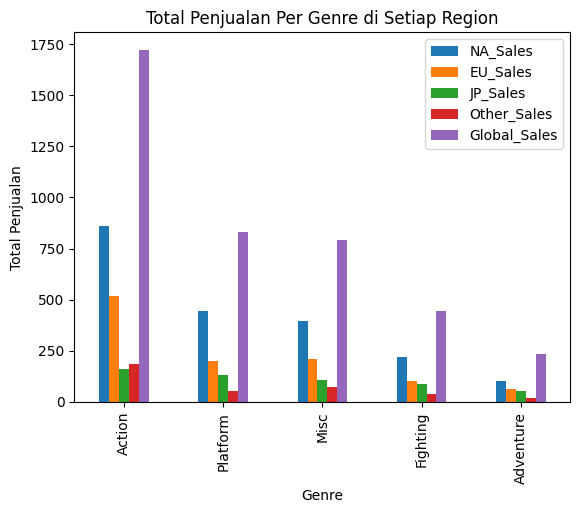

In [75]:
# Menghitung total penjualan per genre di setiap region
sales_by_genre_region = df.groupby(['Genre'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().head(5)

# Hitung total penjualan global per gennre
sales_by_genre_region['Global_Sales'] = sales_by_genre_region.sum(axis=1)


# Urutkan berdasarkan penjualan global dan ambil 5 teratas
top_5_genre = sales_by_genre_region.sort_values('Global_Sales', ascending=False).head(5)

# Menampilkan hasil dalam bentuk tabel
print(top_5_genre)

# Membuat visualisasi
top_5_genre.plot(kind='bar')
plt.title('Total Penjualan Per Genre di Setiap Region')
plt.xlabel('Genre')
plt.ylabel('Total Penjualan')
plt.show()

**Insight** : Grafik ini menunjukkan genre-genre mana yang paling populer secara global dan di masing-masing region. Genre dengan batang grafik tertinggi menunjukkan dominasi pasar yang signifikan. Dengan membandingkan tinggi batang untuk setiap genre di berbagai region, kita dapat mengidentifikasi perbedaan preferensi gamer di berbagai negara atau wilayah. 

**Statistik Inferensial**

**Q3 : Apakah ada perbedaan antara global sales setiap platform?**

Uji Hipotesis <br>
H0 : Tidak ada perbedaan sales antara platform PC dan X360 <br>
H1 : Ada perbedaan sales antara platform PC dan X360. <br>

In [35]:
# Memisahkan data berdasarkan genre
PC_data = df[df['Platform'] == 'PC']['Global_Sales']
X360_data = df[df['Platform'] == 'X360']['Global_Sales']

# Uji t-test
t_stat, p_value = stats.ttest_ind(PC_data, X360_data)

print('t-statistic:', t_stat)
print('p-value:', p_value)

# Interpretasi
alpha = 0.05
if p_value < alpha:
    print("Ada perbedaan signifikan dalam sales antara platform PC dan X360.")
else:
    print("Tidak ada bukti yang cukup untuk menyatakan perbedaan signifikan.")

t-statistic: -9.039041568240334
p-value: 3.409027620394838e-19
Ada perbedaan signifikan dalam sales antara platform PC dan X360.


**Statistik Deskriptif**

**Q4 : Bagaimana perbandingan sales antar region?**


Korelasi antara Sales NA, EU, JP and other::
|             | NA_Sales   | EU_Sales   | JP_Sales   | Other_Sales   |
|:------------|:-----------|:-----------|:-----------|:--------------|
| NA_Sales    | 1          | 0.768923   | 0.451283   | 0.634518      |
| EU_Sales    | 0.768923   | 1          | 0.436379   | 0.726256      |
| JP_Sales    | 0.451283   | 0.436379   | 1          | 0.290559      |
| Other_Sales | 0.634518   | 0.726256   | 0.290559   | 1             |


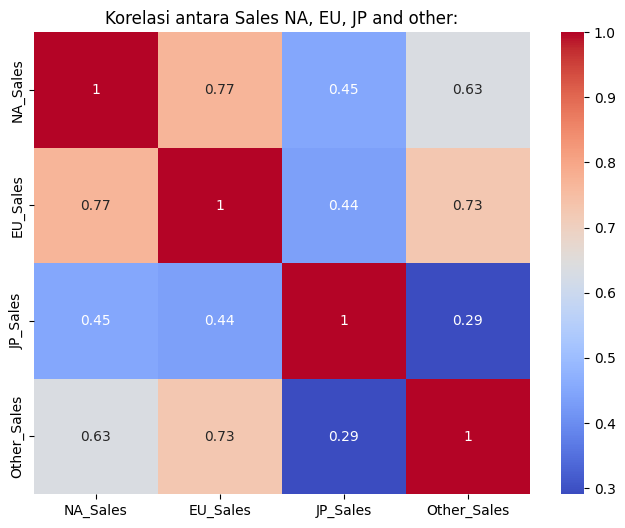

In [74]:
# Hitung korelasi antara NA_Sales, EU_Sales, JP_Sales
correlation = df[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']].corr()
print("\nKorelasi antara Sales NA, EU, JP and other::")
print(correlation.to_markdown(numalign="left", stralign="left"))

# Buat heatmap untuk memvisualisasikan korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Korelasi antara Sales NA, EU, JP and other:')
plt.show()

**Insight** : Gambaran visual tentang hubungan antara penjualan game di berbagai region (Amerika Utara, Eropa, Jepang dan lainnya). Warna pada heatmap menunjukkan tingkat korelasi antara variabel: <br>
1. Warna Merah: Korelasi positif yang kuat, artinya ketika penjualan di satu region tinggi, cenderung tinggi juga di region lain.<br>
2. Warna Biru: Korelasi negatif yang kuat, artinya ketika penjualan di satu region tinggi, cenderung rendah di region lain.<br>
3. Warna Putih: Korelasi yang lemah atau tidak ada korelasi.

**Q5: Kapan game paling banyak di rilis?**

In [23]:
# Hitung jumlah game per tahun
game_per_year = df['Year'].value_counts().sort_index()

# Ubah Series menjadi DataFrame untuk fleksibilitas lebih
game_per_year = game_per_year.to_frame(name='Jumlah Game')

# Reset index agar 'Year' menjadi kolom
game_per_year = game_per_year.reset_index()
game_per_year.rename(columns={'index': 'Year'}, inplace=True)

In [40]:
top_5_years = game_per_year.sort_values('Jumlah Game', ascending=False).head(5)
top_5_years

,Year,Jumlah Game
29,2009-01-01,1431
28,2008-01-01,1428
30,2010-01-01,1257
27,2007-01-01,1201
31,2011-01-01,1136


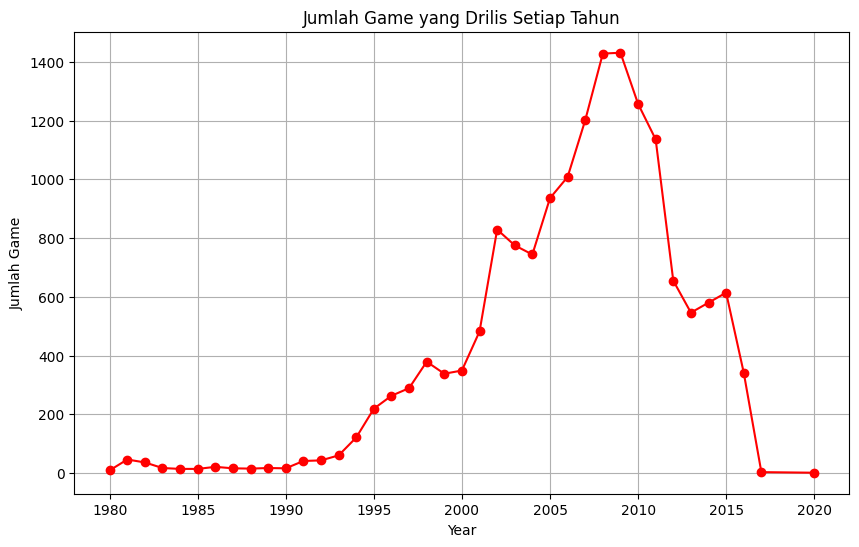

In [ ]:
# Membuat visualisasi dengan line chart
plt.figure(figsize=(10,6))
plt.plot(game_per_year['Year'], game_per_year['Jumlah Game'], marker='o', linestyle='-',color=
         'red')
plt.title('Jumlah Game yang Drilis Setiap Tahun')
plt.xlabel('Year')
plt.ylabel('Jumlah Game')
plt.grid(True)
plt.show()

**Insight** : Grafik ini memberikan gambaran yang jelas tentang bagaimana jumlah game yang dirilis berubah dari waktu ke waktu. Pada grafik ini dapat dilihat apakah ada tahun-tahun tertentu yang mengalami peningkatan atau penurunan jumlah rilis game dan tahun 2009 adalah tahun paling tinggi merilis game yaitu sejumlah 1431

**Q6 : Di platform mana yang memiliki sales tertinggi di masing-masing region?**

In [76]:
# Menghitung total penjualan per platform di setiap region
sales_by_platform_region = df.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Hitung total penjualan global per platform
sales_by_platform_region['Global_Sales'] = sales_by_platform_region.sum(axis=1)

# Urutkan berdasarkan penjualan global dan ambil 5 teratas
top_5_platforms = sales_by_platform_region.sort_values('Global_Sales', ascending=False).head(5)

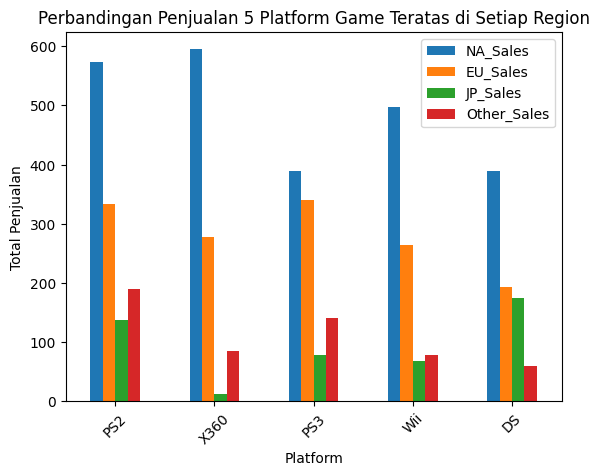

In [77]:
# Membuat visualisasi dengan bar chart (tanpa nilai numerik pada batang)
top_5_platforms[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].plot(kind='bar')
plt.title('Perbandingan Penjualan 5 Platform Game Teratas di Setiap Region')
plt.xlabel('Platform')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.legend(loc='upper right') 
plt.show()

**Insight** : Grafik batang akan menunjukkan platform mana yang memiliki pangsa pasar terbesar secara global. Platform dengan batang grafik paling tinggi mengindikasikan dominasi yang signifikan di pasar game. Dengan membandingkan tinggi batang untuk setiap region, kita dapat melihat perbedaan preferensi gamer di berbagai negara atau wilayah. Misalnya, jika platform tertentu memiliki batang yang sangat tinggi di wilayah Jepang, ini mengindikasikan platform tersebut sangat populer di Jepang Dan inilah platform yg paling populer di region masing2 :
* NA = x360
* EU = PS3
* JP = DS
* Others = PS2

# Kesimpulan

Baik platform, genre, maupun publisher tertentu cenderung mendominasi pasar. Setiap region memiliki preferensi yang berbeda terhadap platform dan genre tertentu. Hal ini terlihat jelas dalam perbandingan penjualan di berbagai region. 
Ada kemungkinan ditemukan korelasi antara platform, genre, dan publisher. Misalnya, platform tertentu mungkin lebih dominan pada genre tertentu, atau publisher tertentu mungkin lebih fokus pada region tertentu.

Pengembang game dapat menggunakan data ini untuk menentukan platform mana yang harus ditargetkan seperti platform PS2 sebagai platform dengan sales tertinggi, genre apa yang paling menjanjikan dengan contoh genre Action sebagai genre paling diminati, dan region mana yang memiliki potensi pertumbuhan terbesar yaitu NA. Penerbit game dapat menggunakan data ini untuk menyusun strategi pemasaran yang lebih efektif, dengan menargetkan audiens yang tepat berdasarkan preferensi mereka.